In [1]:
import sys
sys.path.append('..')

from Helpers.Helpers import *

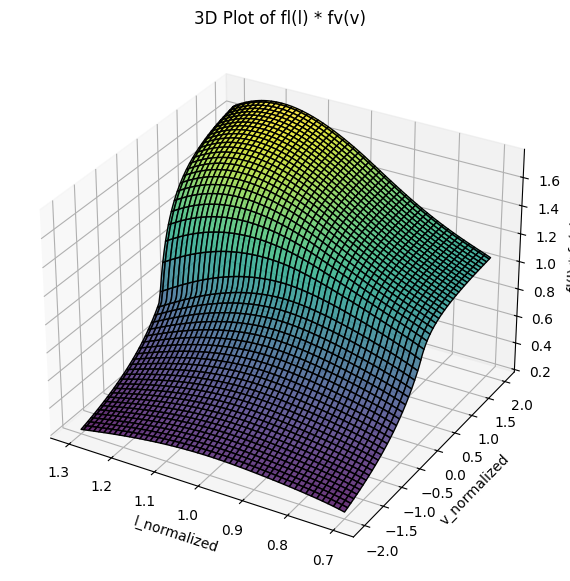

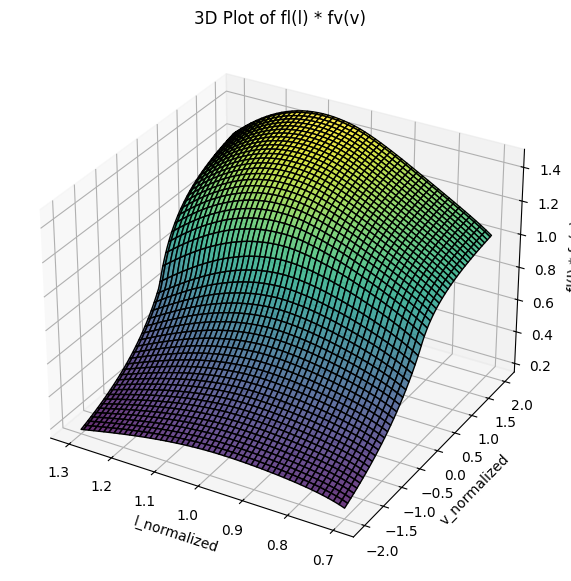

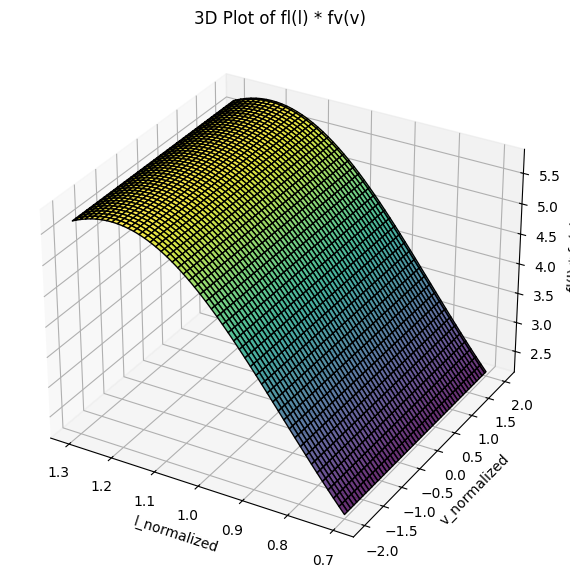

In [ ]:

#lrest = ca.SX([0.09, 0.04, 0.06, 0.1, 0.19, 0.14])
#Fmax = ca.SX([1142, 260, 987, 624, 430, 798])
#vmax = 6.28*lrest
def Todorov_fl(l):
    return np.exp(-np.abs((l**1.93-1)/1.03)**1.87)

def Todorov_fv(l,v):
    if v <= 0 : return (-5.72-v)/(-5.72+(1.38+2.09*l)*v)
    else : return (0.62-(-3.12+4.21*l-2.67*l*l)*v)/(0.62+v)

def Todorov_fp(l):
    return -0.02*np.exp(13.8-18.7*l)

def origin_fast_fl(l):
    return np.exp(-np.abs((l**1.93-1)/1.03)**1.87)

def origin_fast_fv(l,v):
    if v <=0 : return (-7.88-v)/(-7.88+5.88*v)
    if v >= 0: return (0.35-(-4.7+8.41*l-5.34*l*l)*v)/(0.35+v)

def origin_fast_fp(l) : return np.min(-0.02*np.exp(14.7-21*l)+0.02,0)

def origin_slow_fp(l) : return np.min(-0.02*np.exp(14.7-21*l)+0.02,0)

def origin_slow_fl(l):
    return np.exp(-np.abs((l**1.93-1)/1.03)**1.87)

def origin_slow_fv(l,v):
    if v <=0 : return (-7.88-v)/(-7.88+5.88*v)
    if v >= 0: return (0.35-(-4.7+8.41*l-5.34*l*l)*v)/(0.35+v)



# Functions
def my_fl(l_normalized):
    return np.exp(-((l_normalized-1) / 0.5) ** 2)

def my_fv(v_normalized):
    vmax = -0.628
    return (vmax - v_normalized) / (vmax + 0.3 * v_normalized)


# Generate data
l_values = np.linspace(0.7, 1.3, 100)
v_values = np.linspace(-2, 2, 100)
L, V = np.meshgrid(l_values, v_values)
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j] = origin_slow_fl(L[i,j]) * origin_slow_fv(L[i,j],V[i,j]) + origin_slow_fp(L[i,j])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel('l_normalized')
ax.set_ylabel('v_normalized')
ax.set_zlabel('fl(l) * fv(v)')
ax.set_title('3D Plot of fl(l) * fv(v)')
ax.invert_xaxis()

plt.show()
# Generate data
l_values = np.linspace(0.7, 1.3, 100)
v_values = np.linspace(-2, 2, 100)
L, V = np.meshgrid(l_values, v_values)
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j] = Todorov_fl(L[i,j]) * Todorov_fv(L[i,j],V[i,j]) + Todorov_fp(L[i,j])

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel('l_normalized')
ax.set_ylabel('v_normalized')
ax.set_zlabel('fl(l) * fv(v)')
ax.set_title('3D Plot of fl(l) * fv(v)')
ax.invert_xaxis()

plt.show()

# Generate data
l_values = np.linspace(0.7, 1.3, 100)
v_values = np.linspace(-2, 2, 100)
L, V = np.meshgrid(l_values, v_values)
Z = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        Z[i,j] = my_fl(L[i,j]) * my_fv(L[i,j]) 

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(L, V, Z, cmap='viridis', edgecolor='k', alpha=0.8)

# Labels and title
ax.set_xlabel('l_normalized')
ax.set_ylabel('v_normalized')
ax.set_zlabel('fl(l) * fv(v)')
ax.set_title('3D Plot of fl(l) * fv(v)')
ax.invert_xaxis()

plt.show()
